<a href="https://colab.research.google.com/github/AntoniXGaudi/Data_Analysis_1/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CONFIDENCE INTERVALS

# EXERCISE 1. 

# What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures 
# provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 


In [ ]:
import numpy as np
from scipy import stats
import pandas as pd      
import warnings
import seaborn as sns
from scipy import stats

In [ ]:
ci_t = stats.t.interval(0.99,     
                        129, # | the only difference from ci_z: we must specify the degrees of freedom
                        loc=98.25, 
                        scale=0.73/(130 ** 0.5))
ci_t

(98.08260738705933, 98.41739261294067)

In [ ]:
# EXERCISE 2. 

# The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of
# patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and 
# standard deviation equal to 5.4 and 3.1 days, respectively.

In [ ]:
ci_t = stats.t.interval(0.95, 499, loc=5.4, scale=(3.1/(500 ** 0.5)))  # 3.1 = std of population, sem = std/(n ** 0.5)
ci_t

(5.127617354510309, 5.672382645489692)

In [ ]:
# ci_t = (0, 11.49066)

In [ ]:
# EXERCISE 3

# The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. 
# A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of 
# paying substandard wages? Use an α = .01 level test

In [ ]:
# stats.ttest_1samp()  cannot be used since we only have the mean and n, but not the sample itself!

import math
from scipy import stats
from scipy.stats import t

# Population parameters
mu = 13.20
sigma = 2.50

# Sample parameters
n = 40
x_bar = 12.20

# Hypothesis test
alpha = 0.01


# Calculate the degrees of freedom
degrees_of_freedom = n - 1

# Calculate the critical value for a one-tailed test
t_crit = stats.t.ppf(alpha, degrees_of_freedom)

t_value = (x_bar - mu) / (sigma / (40 ** 0.5))

p_value = t.sf(np.abs(t_value), degrees_of_freedom ) 


print("T-value:", t_value)
print("Critical Value:", t_crit)
print("P-value:", p_value)

if t_value < t_crit:
    print("The company can be accused of paying substandard wages.")
else:
    print("There is not enough evidence to accuse the company of paying substandard wages.")

T-value: -2.5298221281347035
Critical Value: -2.425841409735629
P-value: 0.0077816812266594355
The company can be accused of paying substandard wages.


In [ ]:
# EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results 
# shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average 
# shear strength, at the 1% significance level? 

In [ ]:
soil1 = [1.442, 1.943, 1.11, 1.912, 1.553, 1.641, 1.499, 1.347, 1.685, 1.578, 1.866, 1.653, 1.665, 1.64, 1.976, 1.754, 1.589, 1.976, 1.863, 1.932, 1.57, 1.613, 2.054, 1.55, 1.714, 1.896, 1.737, 1.74, 1.708, 1.548]
soil2 = [1.364, 1.878, 1.337, 1.828, 1.371, 1.428, 1.119, 1.373, 1.589, 1.714, 1.26, 1.492, 1.395, 1.778, 1.611, 1.202, 1.542, 1.094, 1.557, 1.053, 1.183, 1.367, 1.144, 1.151, 1.561, 1.192, 1.489, 1.379, 1.501, 1.277, 1.593, 1.172, 1.51, 1.74, 1.355]

alpha = 0.01


p_value_levene = stats.levene(soil1, soil2)
print(f"p_value_levene = {p_value_levene}")

# with a p-value of 0.5767 and assuming an alpha of 0.05, we fail to reject the null hypothesis. This means we don't have 
# enough evidence to conclude that the variances are different, so we assume equal variances. 

var_soil1 = np.var(soil1)
var_soil2 = np.var(soil2)
print(f"var_soil1 = {var_soil1}")
print(f"var_soil2 = {var_soil2}")

t_stat, p_value = stats.ttest_ind(soil1, soil2, equal_var=True)

print(f"t_stat = {t_stat}")
print(f"p_value = {p_value}")

if p_value < alpha:
    print("The soils appear to differ with respect to average shear strength at the 1% significance level.")
else:
    print("There is not enough evidence to conclude that the soils differ with respect to average shear strength at the 1% significance level.")


p_value_levene = LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)
var_soil1 = 0.041381826666666656
var_soil2 = 0.04666912979591836
t_stat = 5.1681473319343345
p_value = 2.593228732352821e-06
The soils appear to differ with respect to average shear strength at the 1% significance level.


In [ ]:
# EXERCISE 5. The following dataset is based on data provided by the World Bank 
# (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

# Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
# Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

# CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345
    

  Country Code Continent_Code  internet_users_per_100      Math   Reading  \
0          ALB             EU               63.252933  413.1570  405.2588   
1          ARE             AS               90.500000  427.4827  433.5423   
2          ARG            SAM               68.043064  409.0333  425.3031   
3          AUS             OC               84.560519  493.8962  502.9006   
4          AUT             EU               83.940142  496.7423  484.8656   

    Science  
0  427.2250  
1  436.7311  
2  432.2262  
3  509.9939  
4  495.0375  
Dimensions = (70, 6)


Continent Codes: ['EU' 'AS' 'SAM' 'OC' 'NAM' 'AF']


AF
count      2.000000
mean     363.212100
std        5.099513
min      359.606200
25%      361.409150
50%      363.212100
75%      365.015050
max      366.818000
Name: Math, dtype: float64

AS
count     17.000000
mean     466.216647
std       64.356490
min      380.259000
25%      403.833200
50%      459.816000
75%      531.296100
max      564.189700
Name: Math, dtype: floa

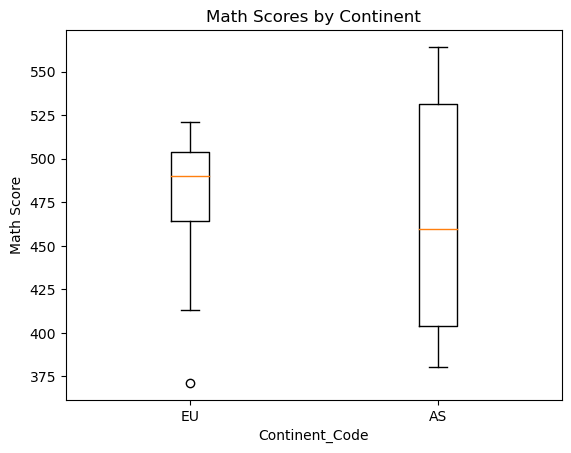

In [ ]:
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_excel("C:/Data Science/Statistics/Assigments/2015 PISA Test.xlsx")

print(df.head())
print(f"Dimensions = {df.shape}")
print("\n")
print(f"Continent Codes: {df['Continent_Code'].unique()}")   # NA created NaNs for North America, so I changed NA to NAM and SA to SAM
print("\n")

# Get descriptive statistics for each continent group
grouped = df.groupby('Continent_Code')


for continent, data in grouped:
    print(continent)
    print(data['Math'].describe())
    print()

# Test for a difference in math scores between EU and AS countries
eu_scores = df.loc[df['Continent_Code'] == 'EU']['Math']
as_scores = df.loc[df['Continent_Code'] == 'AS']['Math']
t, p = stats.ttest_ind(eu_scores, as_scores, equal_var=True)
print(f"t = {t:.3f}, p = {p:.3f}")

# Create side-by-side box plots of math scores for EU and AS countries
plt.boxplot([eu_scores, as_scores], labels=['EU', 'AS'])
plt.title('Math Scores by Continent')
plt.xlabel('Continent_Code')
plt.ylabel('Math Score')
plt.show()